In [160]:
import datetime
datetime.datetime.strptime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
import pandas as pd
import seaborn as sns

In [161]:
sensor_data = pd.read_excel('Sensor Data.xlsx')
sensor_data

,Chemical,Monitor,Date Time,Reading
0,Methylosmolene,3,2016-04-01 00:00:00,2.683820
1,Methylosmolene,7,2016-04-01 00:00:00,2.630640
2,Chlorodinine,3,2016-04-01 00:00:00,1.259170
3,Chlorodinine,7,2016-04-01 00:00:00,0.943983
4,AGOC-3A,3,2016-04-01 00:00:00,0.722303
...,...,...,...,...
79238,AGOC-3A,1,2016-12-31 23:00:00,0.078266
79239,Methylosmolene,3,2016-12-31 23:00:00,0.062784
79240,AGOC-3A,2,2016-12-31 23:00:00,0.060814
79241,Appluimonia,7,2016-12-31 23:00:00,0.039729


In [162]:
sensor_data.columns

Index(['Chemical', 'Monitor', 'Date Time ', 'Reading'], dtype='object')

In [163]:
sensor_data.rename({'Date Time ': 'Date_Time'}, axis=1, inplace=True)
sensor_data.columns

Index(['Chemical', 'Monitor', 'Date_Time', 'Reading'], dtype='object')

In [164]:
sensor_data.isna().sum()

Chemical     0
Monitor      0
Date_Time    0
Reading      0
dtype: int64

In [165]:
# Convert Date_Time column to datetime

pd.to_datetime(sensor_data['Date_Time'])
sensor_data.dtypes

Chemical             object
Monitor               int64
Date_Time    datetime64[ns]
Reading             float64
dtype: object

In [166]:
# Now that the Date_Time column is a datetime, we can make it the index
sensor_data.set_index('Date_Time')

,Chemical,Monitor,Reading
Date_Time,,,
2016-04-01 00:00:00,Methylosmolene,3,2.683820
2016-04-01 00:00:00,Methylosmolene,7,2.630640
2016-04-01 00:00:00,Chlorodinine,3,1.259170
2016-04-01 00:00:00,Chlorodinine,7,0.943983
2016-04-01 00:00:00,AGOC-3A,3,0.722303
...,...,...,...
2016-12-31 23:00:00,AGOC-3A,1,0.078266
2016-12-31 23:00:00,Methylosmolene,3,0.062784
2016-12-31 23:00:00,AGOC-3A,2,0.060814


In [167]:
# Unique Values in Monitor

sensor_data["Monitor"].unique()

array([3, 7, 2, 8, 6, 1, 4, 9, 5])

## Sensor 1 Data

In [240]:
# Create a new data fram for Sensor 1
sensor_1 = sensor_data[sensor_data.Monitor == 1]
sensor_1 = sensor_1.sort_values(by=['Chemical'])

In [268]:
sensor_1.describe()

,Monitor,Reading
count,8804.0,8804.000000
mean,1.0,0.246273
std,0.0,0.524598
min,1.0,0.001003
25%,1.0,0.102151
50%,1.0,0.209811
75%,1.0,0.336956
max,1.0,31.809970


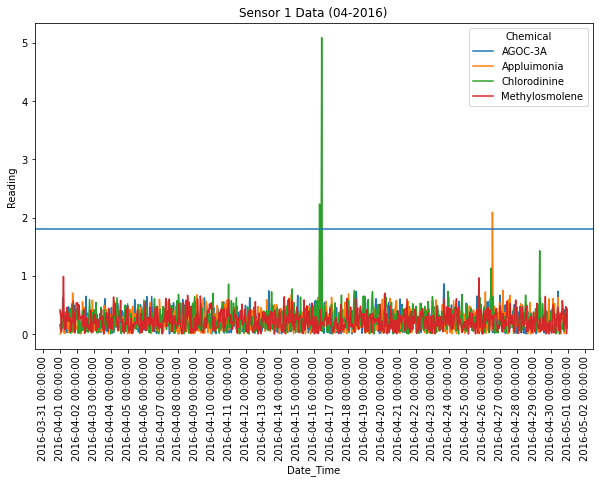

In [271]:
sensor_1_2016_04 = sensor_1[sensor_1['Date_Time'].dt.strftime('%Y-%m') == '2016-04']
sensor_1_2016_04 = sensor_1_2016_04.sort_values(by=['Chemical'])

fig, ax = plt.subplots(figsize=(10,6))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M:%S'))
plt.xticks(rotation = 90)
ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))
sns.lineplot(data = sensor_1_2016_04, x = 'Date_Time', y = 'Reading', hue = 'Chemical').set(title = "Sensor 1 Data (04-2016)")
plt.axhline(1.81)

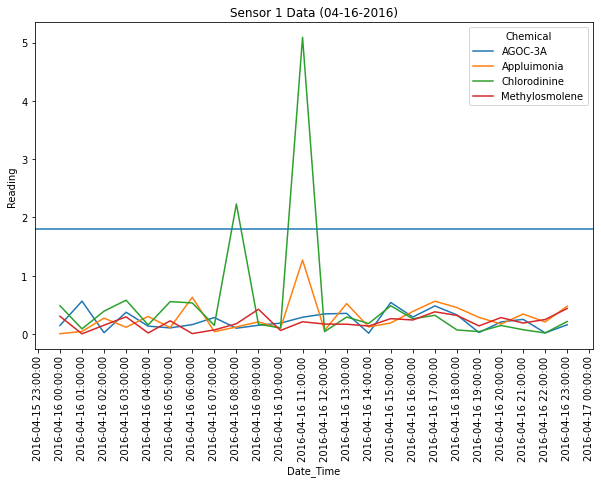

In [276]:
sensor_1_2016_04_16 = sensor_1_2016_04[sensor_1_2016_04['Date_Time'].dt.strftime('%Y-%m-%d') == "2016-04-16"] 
sensor_1_2016_04_16 = sensor_1_2016_04_16.sort_values(by=['Chemical'])

fig, ax = plt.subplots(figsize=(10,6))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M:%S'))
plt.xticks(rotation = 90)
ax.xaxis.set_major_locator(mdates.HourLocator(interval=1))
sns.lineplot(data = sensor_1_2016_04_16, x = 'Date_Time', y = 'Reading', hue = 'Chemical').set(title = 'Sensor 1 Data (04-16-2016)')
plt.axhline(1.81)

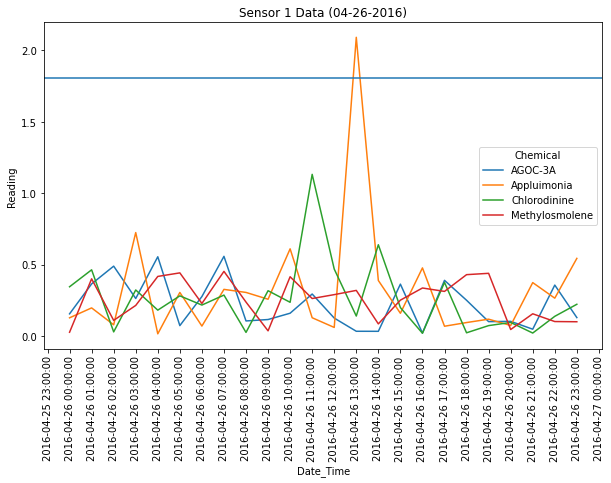

In [277]:
sensor_1_2016_04_26 = sensor_1_2016_04[sensor_1_2016_04['Date_Time'].dt.strftime('%Y-%m-%d') == "2016-04-26"] 
sensor_1_2016_04_26 = sensor_1_2016_04_26.sort_values(by=['Chemical'])

fig, ax = plt.subplots(figsize=(10,6))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M:%S'))
plt.xticks(rotation = 90)
ax.xaxis.set_major_locator(mdates.HourLocator(interval=1))
sns.lineplot(data = sensor_1_2016_04_26, x = 'Date_Time', y = 'Reading', hue = 'Chemical').set(title = 'Sensor 1 Data (04-26-2016)')
plt.axhline(1.81)

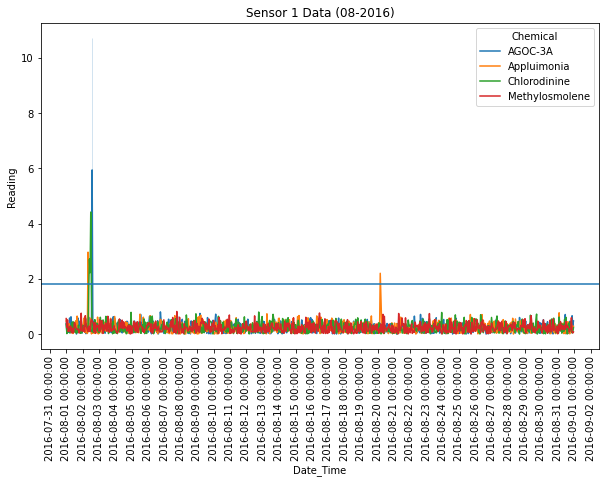

In [278]:
sensor_1_2016_08 = sensor_1[sensor_1['Date_Time'].dt.strftime('%Y-%m') == '2016-08']
sensor_1_2016_08 = sensor_1_2016_08.sort_values(by=['Chemical'])

fig, ax = plt.subplots(figsize=(10,6))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M:%S'))
plt.xticks(rotation = 90)
ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))
sns.lineplot(data = sensor_1_2016_08, x = 'Date_Time', y = 'Reading', hue = 'Chemical').set(title = "Sensor 1 Data (08-2016)")
plt.axhline(1.81)

For Sensor 1 in August, there are significant spikes in sensor readings on the 2nd and the 20th

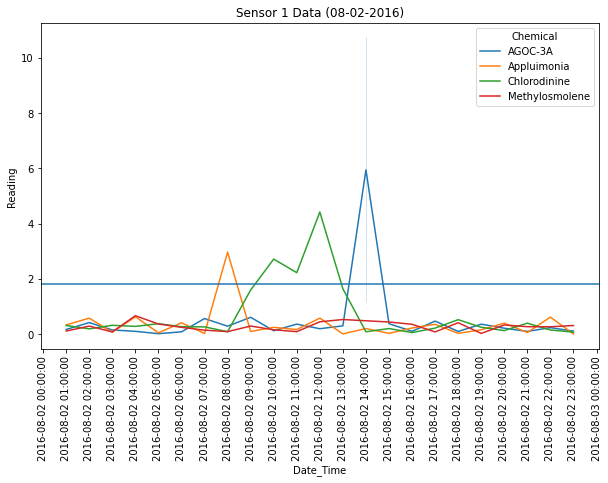

In [279]:
sensor_1_2016_08_02 = sensor_1_2016_08[sensor_1_2016_08['Date_Time'].dt.strftime('%Y-%m-%d') == "2016-08-02"] 
sensor_1_2016_08_02 = sensor_1_2016_08_02.sort_values(by=['Chemical'])

fig, ax = plt.subplots(figsize=(10,6))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M:%S'))
plt.xticks(rotation = 90)
ax.xaxis.set_major_locator(mdates.HourLocator(interval=1))
sns.lineplot(data = sensor_1_2016_08_02, x = 'Date_Time', y = 'Reading', hue = 'Chemical').set(title = 'Sensor 1 Data (08-02-2016)')
plt.axhline(1.81)

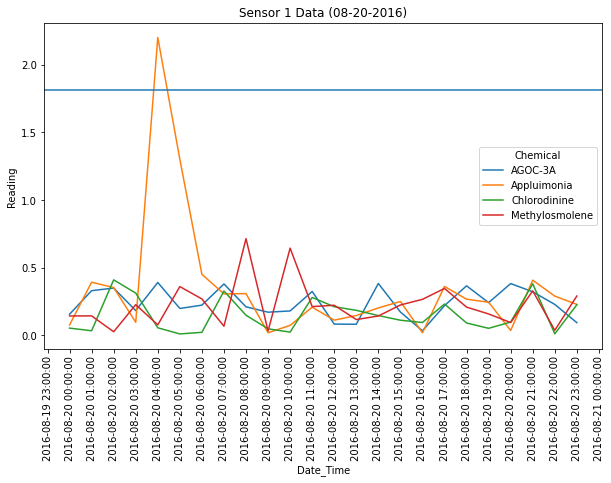

In [281]:
sensor_1_2016_08_20 = sensor_1_2016_08[sensor_1_2016_08['Date_Time'].dt.strftime('%Y-%m-%d') == "2016-08-20"] 
sensor_1_2016_08_20 = sensor_1_2016_08_20.sort_values(by=['Chemical'])

fig, ax = plt.subplots(figsize=(10,6))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M:%S'))
plt.xticks(rotation = 90)
ax.xaxis.set_major_locator(mdates.HourLocator(interval=1))
sns.lineplot(data = sensor_1_2016_08_20, x = 'Date_Time', y = 'Reading', hue = 'Chemical').set(title = 'Sensor 1 Data (08-20-2016)')
plt.axhline(1.81)

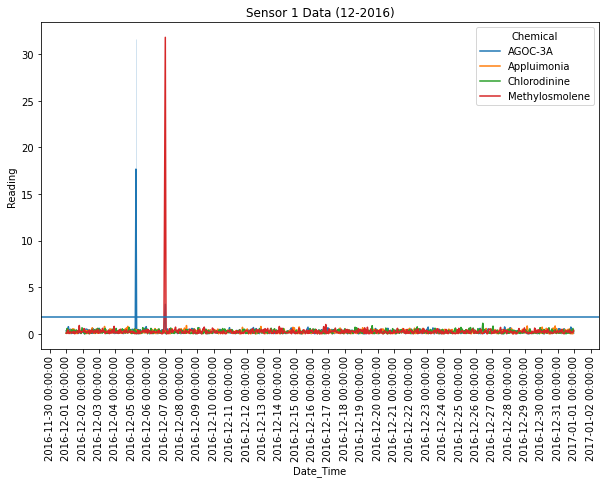

In [282]:
sensor_1_2016_12 = sensor_1[sensor_1['Date_Time'].dt.strftime('%Y-%m') == '2016-12']
sensor_1_2016_12 = sensor_1_2016_12.sort_values(by=['Chemical'])

fig, ax = plt.subplots(figsize=(10,6))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M:%S'))
plt.xticks(rotation = 90)
ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))
sns.lineplot(data = sensor_1_2016_12, x = 'Date_Time', y = 'Reading', hue = 'Chemical').set(title = "Sensor 1 Data (12-2016)")
plt.axhline(1.81)

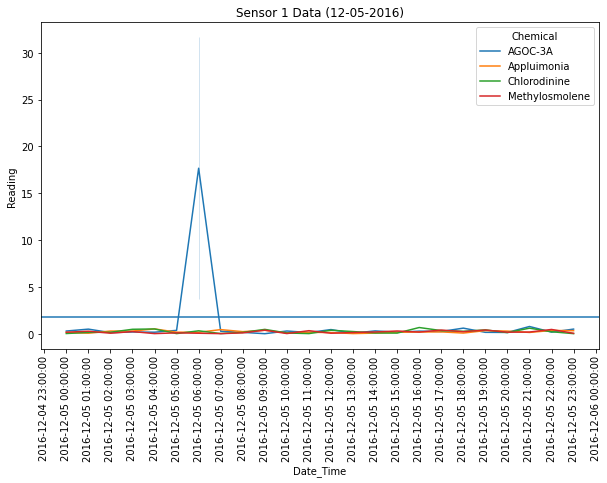

In [287]:
sensor_1_2016_12_05 = sensor_1_2016_12[sensor_1_2016_12['Date_Time'].dt.strftime('%Y-%m-%d') == "2016-12-05"] 
sensor_1_2016_12_05 = sensor_1_2016_12_05.sort_values(by=['Chemical'])

fig, ax = plt.subplots(figsize=(10,6))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M:%S'))
plt.xticks(rotation = 90)
ax.xaxis.set_major_locator(mdates.HourLocator(interval=1))
sns.lineplot(data = sensor_1_2016_12_05, x = 'Date_Time', y = 'Reading', hue = 'Chemical').set(title = 'Sensor 1 Data (12-05-2016)')
plt.axhline(1.81)

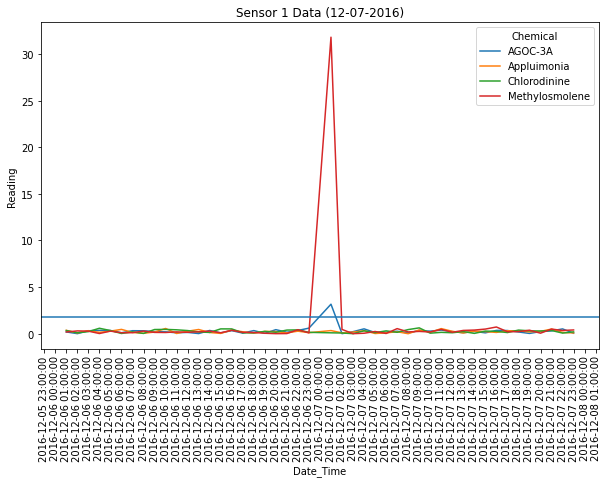

In [291]:
sensor_1_2016_12_07 = sensor_1_2016_12[(sensor_1_2016_12['Date_Time'] > "2016-12-06") & (sensor_1_2016_12['Date_Time'] < "2016-12-08")] 
sensor_1_2016_12_07 = sensor_1_2016_12_07.sort_values(by=['Chemical'])

fig, ax = plt.subplots(figsize=(10,6))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M:%S'))
plt.xticks(rotation = 90)
ax.xaxis.set_major_locator(mdates.HourLocator(interval=1))
sns.lineplot(data = sensor_1_2016_12_07, x = 'Date_Time', y = 'Reading', hue = 'Chemical').set(title = 'Sensor 1 Data (12-07-2016)')
plt.axhline(1.81)

## Sensor 2 Data

In [249]:
# Create a new data fram for Sensor 2
sensor_2 = sensor_data[sensor_data.Monitor == 2]
sensor_2 = sensor_2.sort_values(by=['Chemical'])

In [259]:
sensor_2.describe()

,Monitor,Reading
count,8804.0,8804.000000
mean,2.0,0.392135
std,0.0,1.065055
min,2.0,0.001322
25%,2.0,0.141902
50%,2.0,0.303957
75%,2.0,0.520395
max,2.0,58.463530


In [274]:
# Mean + 3 std

0.39 + (3 * 1.07)

3.6

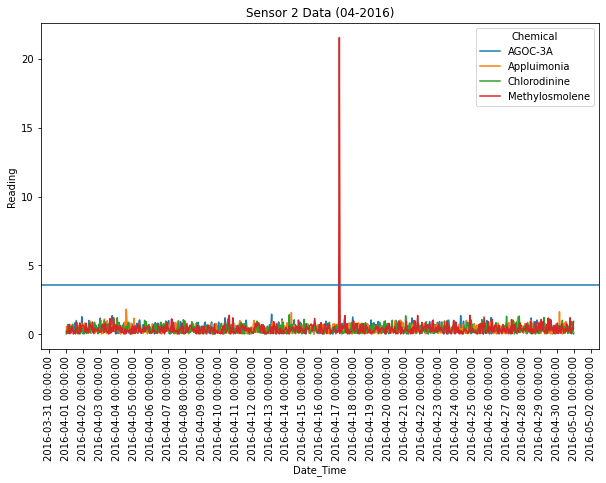

In [293]:
sensor_2_2016_04 = sensor_2[sensor_2['Date_Time'].dt.strftime('%Y-%m') == '2016-04']
sensor_2_2016_04 = sensor_2_2016_04.sort_values(by=['Chemical'])

fig, ax = plt.subplots(figsize=(10,6))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M:%S'))
plt.xticks(rotation = 90)
ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))
sns.lineplot(data = sensor_2_2016_04, x = 'Date_Time', y = 'Reading', hue = 'Chemical').set(title = "Sensor 2 Data (04-2016)")
plt.axhline(3.6)

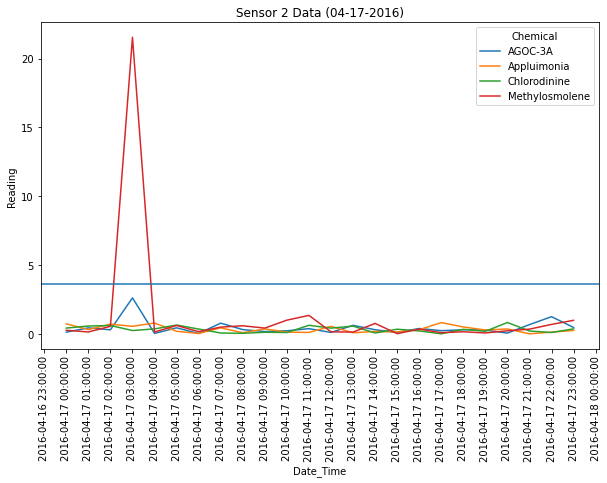

In [297]:
sensor_2_2016_04_17 = sensor_2_2016_04[sensor_2_2016_04['Date_Time'].dt.strftime('%Y-%m-%d') == "2016-04-17"] 
sensor_2_2016_04_17 = sensor_2_2016_04_17.sort_values(by=['Chemical'])

fig, ax = plt.subplots(figsize=(10,6))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M:%S'))
plt.xticks(rotation = 90)
ax.xaxis.set_major_locator(mdates.HourLocator(interval=1))
sns.lineplot(data = sensor_2_2016_04_17, x = 'Date_Time', y = 'Reading', hue = 'Chemical').set(title = 'Sensor 2 Data (04-17-2016)')
plt.axhline(3.6)

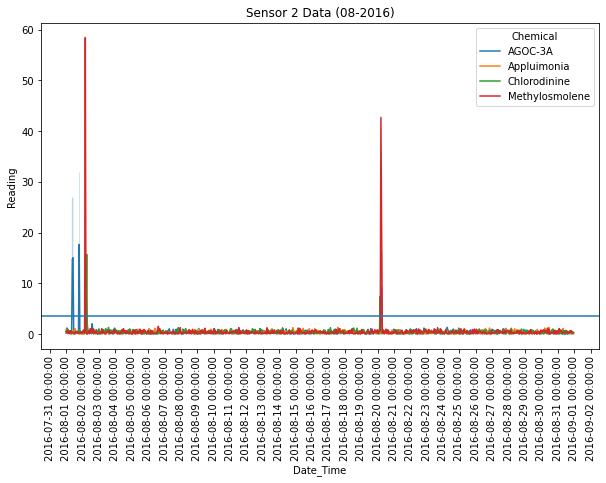

In [292]:
sensor_2_2016_08 = sensor_2[sensor_2['Date_Time'].dt.strftime('%Y-%m') == '2016-08']
sensor_2_2016_08 = sensor_2_2016_08.sort_values(by=['Chemical'])

fig, ax = plt.subplots(figsize=(10,6))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M:%S'))
plt.xticks(rotation = 90)
ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))
sns.lineplot(data = sensor_2_2016_08, x = 'Date_Time', y = 'Reading', hue = 'Chemical').set(title = "Sensor 2 Data (08-2016)")
plt.axhline(3.6)

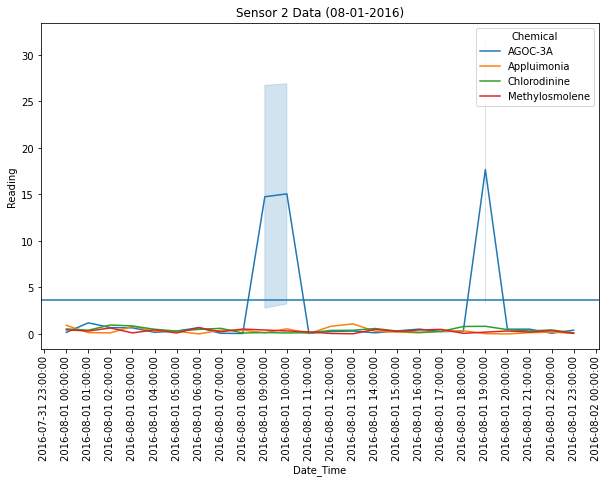

In [298]:
sensor_2_2016_08_01 = sensor_2_2016_08[sensor_2_2016_08['Date_Time'].dt.strftime('%Y-%m-%d') == "2016-08-01"] 
sensor_2_2016_08_01 = sensor_2_2016_08_01.sort_values(by=['Chemical'])

fig, ax = plt.subplots(figsize=(10,6))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M:%S'))
plt.xticks(rotation = 90)
ax.xaxis.set_major_locator(mdates.HourLocator(interval=1))
sns.lineplot(data = sensor_2_2016_08_01, x = 'Date_Time', y = 'Reading', hue = 'Chemical').set(title = 'Sensor 2 Data (08-01-2016)')
plt.axhline(3.6)

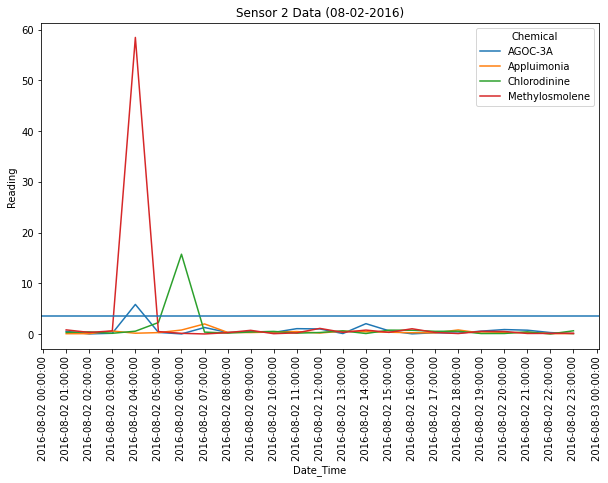

In [299]:
sensor_2_2016_08_02 = sensor_2_2016_08[sensor_2_2016_08['Date_Time'].dt.strftime('%Y-%m-%d') == "2016-08-02"] 
sensor_2_2016_08_02 = sensor_2_2016_08_02.sort_values(by=['Chemical'])

fig, ax = plt.subplots(figsize=(10,6))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M:%S'))
plt.xticks(rotation = 90)
ax.xaxis.set_major_locator(mdates.HourLocator(interval=1))
sns.lineplot(data = sensor_2_2016_08_02, x = 'Date_Time', y = 'Reading', hue = 'Chemical').set(title = 'Sensor 2 Data (08-02-2016)')
plt.axhline(3.6)

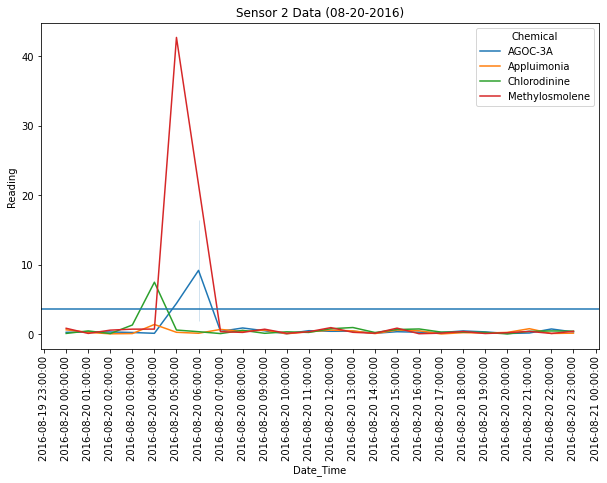

In [301]:
sensor_2_2016_08_20 = sensor_2_2016_08[sensor_2_2016_08['Date_Time'].dt.strftime('%Y-%m-%d') == "2016-08-20"] 
sensor_2_2016_08_20 = sensor_2_2016_08_20.sort_values(by=['Chemical'])

fig, ax = plt.subplots(figsize=(10,6))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M:%S'))
plt.xticks(rotation = 90)
ax.xaxis.set_major_locator(mdates.HourLocator(interval=1))
sns.lineplot(data = sensor_2_2016_08_20, x = 'Date_Time', y = 'Reading', hue = 'Chemical').set(title = 'Sensor 2 Data (08-20-2016)')
plt.axhline(3.6)

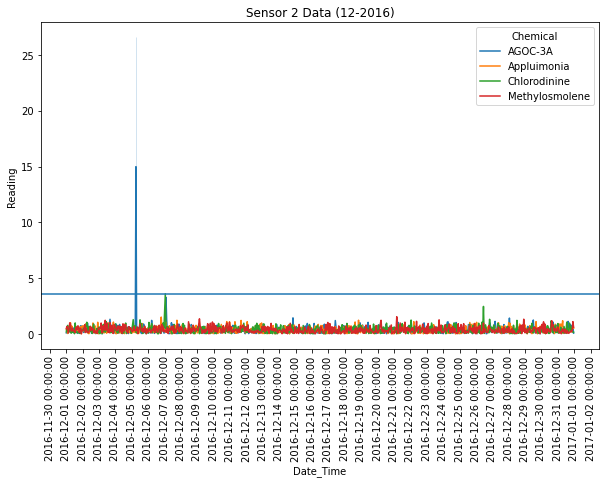

In [294]:
sensor_2_2016_12 = sensor_2[sensor_2['Date_Time'].dt.strftime('%Y-%m') == '2016-12']
sensor_2_2016_12 = sensor_2_2016_12.sort_values(by=['Chemical'])

fig, ax = plt.subplots(figsize=(10,6))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M:%S'))
plt.xticks(rotation = 90)
ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))
sns.lineplot(data = sensor_2_2016_12, x = 'Date_Time', y = 'Reading', hue = 'Chemical').set(title = "Sensor 2 Data (12-2016)")
plt.axhline(3.6)

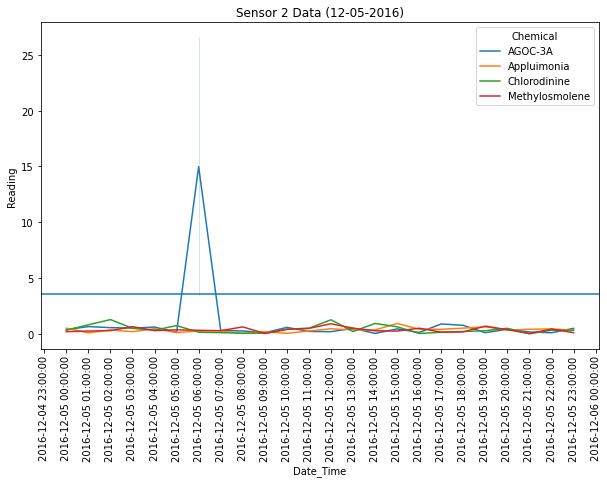

In [302]:
sensor_2_2016_12_05 = sensor_2_2016_12[sensor_2_2016_12['Date_Time'].dt.strftime('%Y-%m-%d') == "2016-12-05"] 
sensor_2_2016_12_05 = sensor_2_2016_12_05.sort_values(by=['Chemical'])

fig, ax = plt.subplots(figsize=(10,6))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M:%S'))
plt.xticks(rotation = 90)
ax.xaxis.set_major_locator(mdates.HourLocator(interval=1))
sns.lineplot(data = sensor_2_2016_12_05, x = 'Date_Time', y = 'Reading', hue = 'Chemical').set(title = 'Sensor 2 Data (12-05-2016)')
plt.axhline(3.6)

## Sensor 3 Data

In [242]:
# Create a new data fram for Sensor 3
sensor_3 = sensor_data[sensor_data.Monitor == 3]
sensor_3 = sensor_3.sort_values(by=['Chemical'])

In [303]:
sensor_3.describe()

,Monitor,Reading
count,8806.0,8806.000000
mean,3.0,1.419200
std,0.0,2.601397
min,3.0,0.001257
25%,3.0,0.506293
50%,3.0,1.005670
75%,3.0,1.810738
max,3.0,85.314590


In [316]:
1.41 + (3 * 2.60)

9.21

In [318]:
mean_3_AGOC = sensor_3.loc[sensor_3['Chemical'] == 'AGOC-3A', 'Reading'].mean()
std_3_AGOC = sensor_3.loc[sensor_3['Chemical'] == 'AGOC-3A', 'Reading'].std()
mean_3_App = sensor_3.loc[sensor_3['Chemical'] == 'Appluimonia', 'Reading'].mean()
std_3_App = sensor_3.loc[sensor_3['Chemical'] == 'Appluimonia', 'Reading'].std()
mean_3_Chlo = sensor_3.loc[sensor_3['Chemical'] == 'Chlorodinine', 'Reading'].mean()
std_3_Chlo = sensor_3.loc[sensor_3['Chemical'] == 'Chlorodinine', 'Reading'].std()
mean_3_Methyl = sensor_3.loc[sensor_3['Chemical'] == 'Methylosmolene', 'Reading'].mean()
std_3_Methyl = sensor_3.loc[sensor_3['Chemical'] == 'Chlorodinine', 'Reading'].std()

print('AGOC-3A Cut-Off: ' + str(mean_3_AGOC + (3 * std_3_AGOC)))
print('Appluimonia Cut-Off: ' + str(mean_3_App + (3 * std_3_App)))
print('Chlorodinine Cut-Off: ' + str(mean_3_Chlo + (3 * std_3_Chlo)))
print('Methylosmolene Cut-Off: ' + str(mean_3_Methyl + (3 * std_3_Methyl)))

AGOC-3A Cut-Off: 14.256939834333636
Appluimonia Cut-Off: 4.43161278162416
Chlorodinine Cut-Off: 4.549085950035326
Methylosmolene Cut-Off: 4.690797732151661


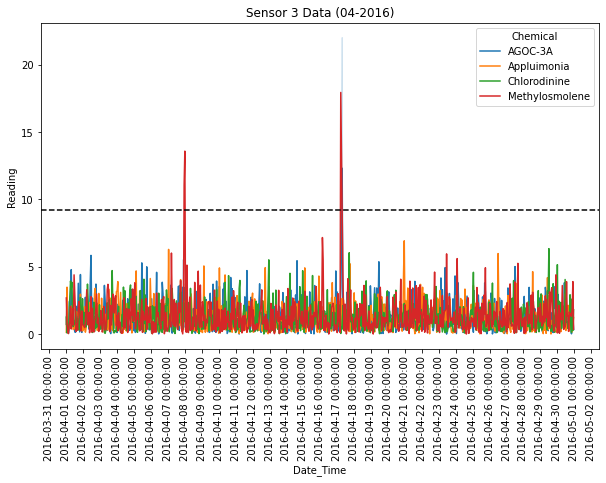

In [329]:
sensor_3_2016_04 = sensor_3[sensor_3['Date_Time'].dt.strftime('%Y-%m') == '2016-04']
sensor_3_2016_04 = sensor_3_2016_04.sort_values(by=['Chemical'])

fig, ax = plt.subplots(figsize=(10,6))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M:%S'))
plt.xticks(rotation = 90)
ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))
sns.lineplot(data = sensor_3_2016_04, x = 'Date_Time', y = 'Reading', hue = 'Chemical').set(title = "Sensor 3 Data (04-2016)")
plt.axhline(y = 9.21, color ="black", linestyle ="--")

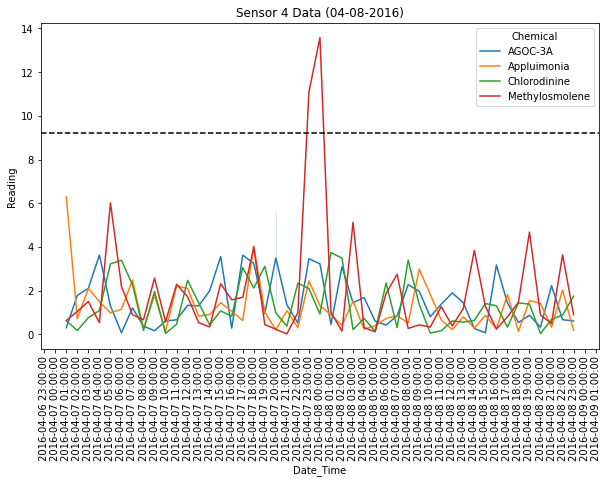

In [369]:
sensor_3_2016_04_08 = sensor_3_2016_04[(sensor_3_2016_04['Date_Time'] > "2016-04-07") & (sensor_3_2016_04['Date_Time'] < "2016-04-9")]
sensor_3_2016_14_08 = sensor_3_2016_04_08.sort_values(by=['Chemical'])

fig, ax = plt.subplots(figsize=(10,6))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M:%S'))
plt.xticks(rotation = 90)
ax.xaxis.set_major_locator(mdates.HourLocator(interval=1))
sns.lineplot(data = sensor_3_2016_04_08, x = 'Date_Time', y = 'Reading', hue = 'Chemical').set(title = 'Sensor 4 Data (04-08-2016)')
plt.axhline(y = 9.21, color ="black", linestyle ="--")

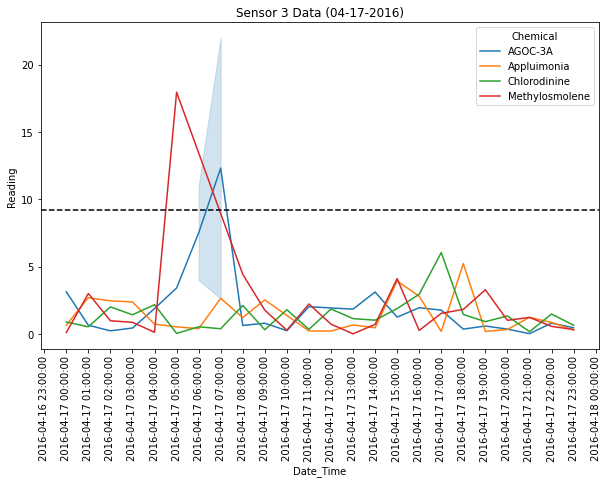

In [370]:
sensor_3_2016_04_17 = sensor_3_2016_04[sensor_3_2016_04['Date_Time'].dt.strftime('%Y-%m-%d') == "2016-04-17"] 
sensor_3_2016_04_17 = sensor_3_2016_04_17.sort_values(by=['Chemical'])

fig, ax = plt.subplots(figsize=(10,6))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M:%S'))
plt.xticks(rotation = 90)
ax.xaxis.set_major_locator(mdates.HourLocator(interval=1))
sns.lineplot(data = sensor_3_2016_04_17, x = 'Date_Time', y = 'Reading', hue = 'Chemical').set(title = 'Sensor 3 Data (04-17-2016)')
plt.axhline(y = 9.21, color ="black", linestyle ="--")

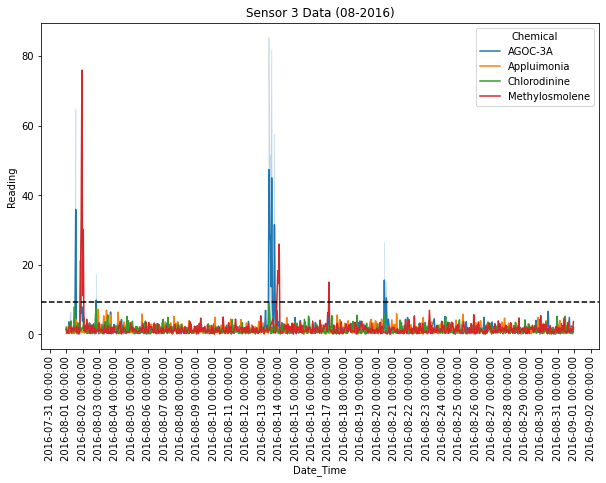

In [328]:
sensor_3_2016_08 = sensor_3[sensor_3['Date_Time'].dt.strftime('%Y-%m') == '2016-08']
sensor_3_2016_08 = sensor_3_2016_08.sort_values(by=['Chemical'])

fig, ax = plt.subplots(figsize=(10,6))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M:%S'))
plt.xticks(rotation = 90)
ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))
sns.lineplot(data = sensor_3_2016_08, x = 'Date_Time', y = 'Reading', hue = 'Chemical').set(title = "Sensor 3 Data (08-2016)")
plt.axhline(y = 9.21, color ="black", linestyle ="--")

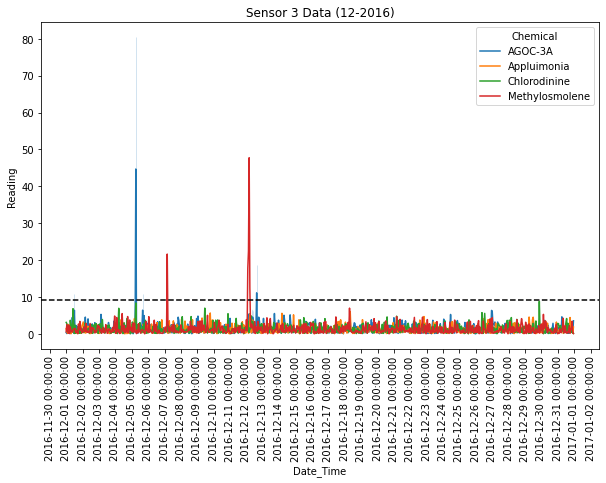

In [330]:
sensor_3_2016_12 = sensor_3[sensor_3['Date_Time'].dt.strftime('%Y-%m') == '2016-12']
sensor_3_2016_12 = sensor_3_2016_12.sort_values(by=['Chemical'])

fig, ax = plt.subplots(figsize=(10,6))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M:%S'))
plt.xticks(rotation = 90)
ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))
sns.lineplot(data = sensor_3_2016_12, x = 'Date_Time', y = 'Reading', hue = 'Chemical').set(title = "Sensor 3 Data (12-2016)")
plt.axhline(y = 9.21, color ="black", linestyle ="--")

## Sensor 4 Data

In [243]:
# Create a new data fram for Sensor 4
sensor_4 = sensor_data[sensor_data.Monitor == 4]
sensor_4 = sensor_4.sort_values(by=['Chemical'])

In [304]:
sensor_4.describe()

,Monitor,Reading
count,8804.0,8804.000000
mean,4.0,1.275548
std,0.0,1.885072
min,4.0,0.001054
25%,4.0,0.440271
50%,4.0,1.112320
75%,4.0,1.867885
max,4.0,65.718980


In [331]:
1.28 + (3 * 1.89)

6.95

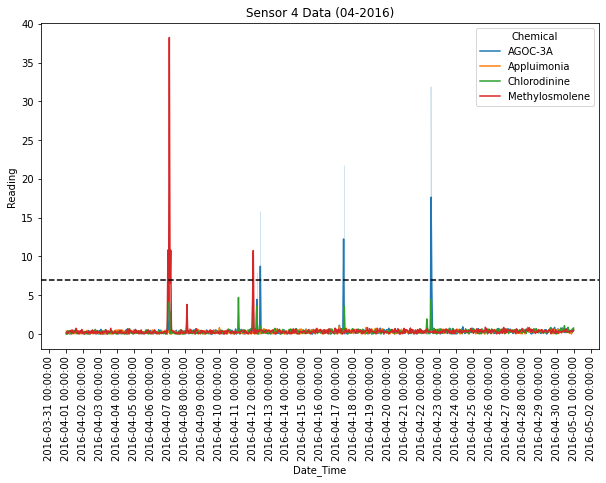

In [342]:
sensor_4_2016_04 = sensor_4[sensor_4['Date_Time'].dt.strftime('%Y-%m') == '2016-04']
sensor_4_2016_04 = sensor_4_2016_04.sort_values(by=['Chemical'])

fig, ax = plt.subplots(figsize=(10,6))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M:%S'))
plt.xticks(rotation = 90)
ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))
sns.lineplot(data = sensor_4_2016_04, x = 'Date_Time', y = 'Reading', hue = 'Chemical').set(title = "Sensor 4 Data (04-2016)")
plt.axhline(y = 6.95, color ="black", linestyle ="--")

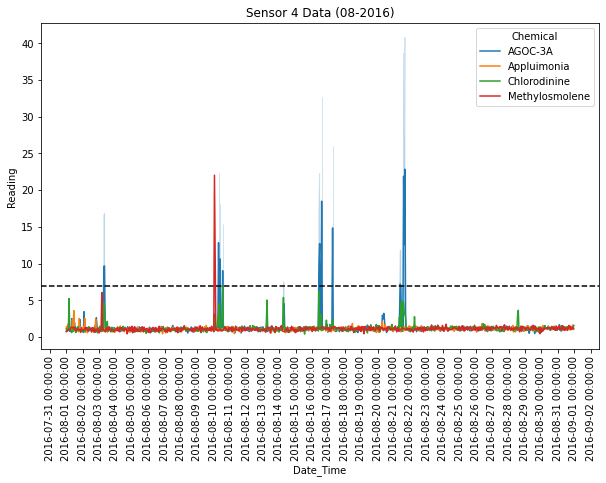

In [354]:
sensor_4_2016_08 = sensor_4[sensor_4['Date_Time'].dt.strftime('%Y-%m') == '2016-08']
sensor_4_2016_08 = sensor_4_2016_08.sort_values(by=['Chemical'])

fig, ax = plt.subplots(figsize=(10,6))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M:%S'))
plt.xticks(rotation = 90)
ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))
sns.lineplot(data = sensor_4_2016_08, x = 'Date_Time', y = 'Reading', hue = 'Chemical').set(title = "Sensor 4 Data (08-2016)")
plt.axhline(y = 6.95, color ="black", linestyle ="--")

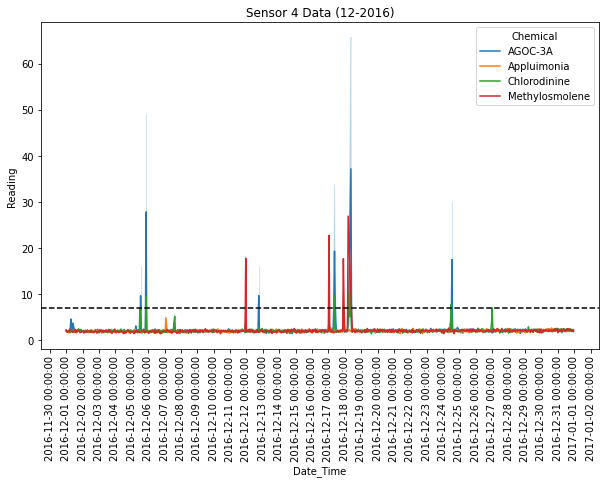

In [355]:
sensor_4_2016_12 = sensor_4[sensor_4['Date_Time'].dt.strftime('%Y-%m') == '2016-12']
sensor_4_2016_12 = sensor_4_2016_12.sort_values(by=['Chemical'])

fig, ax = plt.subplots(figsize=(10,6))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M:%S'))
plt.xticks(rotation = 90)
ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))
sns.lineplot(data = sensor_4_2016_12, x = 'Date_Time', y = 'Reading', hue = 'Chemical').set(title = "Sensor 4 Data (12-2016)")
plt.axhline(y = 6.95, color ="black", linestyle ="--")

## Sensor 5 Data

In [244]:
# Create a new data fram for Sensor 5
sensor_5 = sensor_data[sensor_data.Monitor == 5]
sensor_5 = sensor_5.sort_values(by=['Chemical'])

In [305]:
sensor_5.describe()

,Monitor,Reading
count,8804.0,8804.000000
mean,5.0,0.614483
std,0.0,2.010543
min,5.0,0.001040
25%,5.0,0.161514
50%,5.0,0.342608
75%,5.0,0.625506
max,5.0,84.635990


In [332]:
0.61 + (3 * 2.01)

6.64

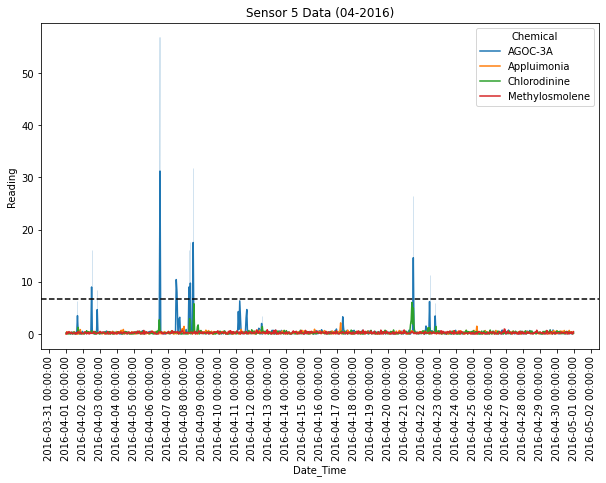

In [344]:
sensor_5_2016_04 = sensor_5[sensor_5['Date_Time'].dt.strftime('%Y-%m') == '2016-04']
sensor_5_2016_04 = sensor_5_2016_04.sort_values(by=['Chemical'])

fig, ax = plt.subplots(figsize=(10,6))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M:%S'))
plt.xticks(rotation = 90)
ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))
sns.lineplot(data = sensor_5_2016_04, x = 'Date_Time', y = 'Reading', hue = 'Chemical').set(title = "Sensor 5 Data (04-2016)")
plt.axhline(y = 6.64, color ="black", linestyle ="--")

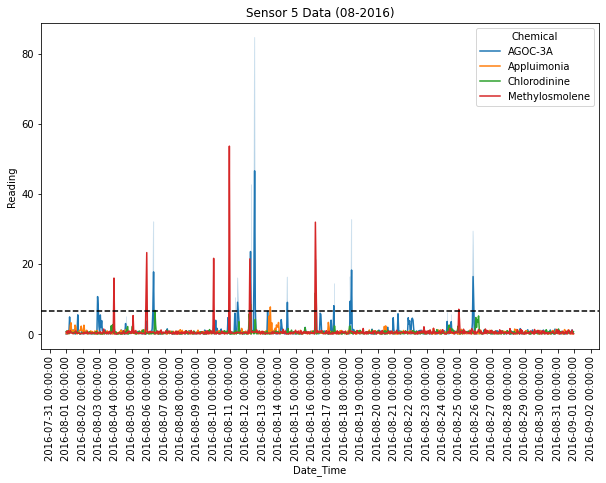

In [412]:
sensor_5_2016_08 = sensor_5[sensor_5['Date_Time'].dt.strftime('%Y-%m') == '2016-08']
sensor_5_2016_08 = sensor_5_2016_08.sort_values(by=['Chemical'])

fig, ax = plt.subplots(figsize=(10,6))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M:%S'))
plt.xticks(rotation = 90)
ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))
sns.lineplot(data = sensor_5_2016_08, x = 'Date_Time', y = 'Reading', hue = 'Chemical').set(title = "Sensor 5 Data (08-2016)")
plt.axhline(y = 6.64, color ="black", linestyle ="--")

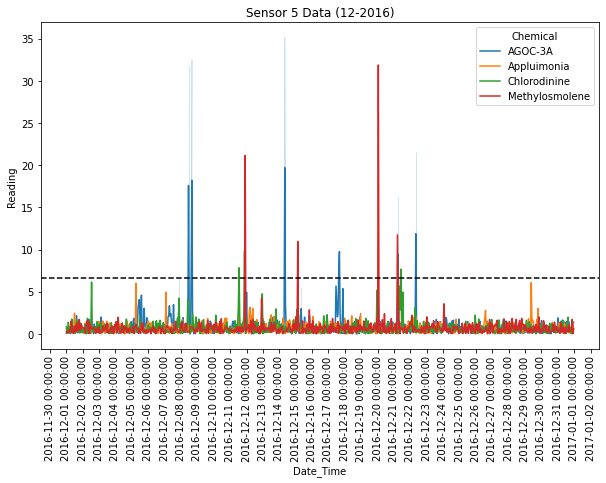

In [357]:
sensor_5_2016_12 = sensor_5[sensor_5['Date_Time'].dt.strftime('%Y-%m') == '2016-12']
sensor_5_2016_12 = sensor_5_2016_12.sort_values(by=['Chemical'])

fig, ax = plt.subplots(figsize=(10,6))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M:%S'))
plt.xticks(rotation = 90)
ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))
sns.lineplot(data = sensor_5_2016_12, x = 'Date_Time', y = 'Reading', hue = 'Chemical').set(title = "Sensor 5 Data (12-2016)")
plt.axhline(y = 6.64, color ="black", linestyle ="--")

## Sensor 6 Data

In [250]:
# Create a new data fram for Sensor 6
sensor_6 = sensor_data[sensor_data.Monitor == 6]
sensor_6 = sensor_6.sort_values(by=['Chemical'])

In [306]:
sensor_6.describe()

,Monitor,Reading
count,8805.0,8805.000000
mean,6.0,0.841147
std,0.0,4.174187
min,6.0,0.001187
25%,6.0,0.268392
50%,6.0,0.405042
75%,6.0,0.549735
max,6.0,100.776400


In [333]:
0.84 + (3 * 4.17)

13.35

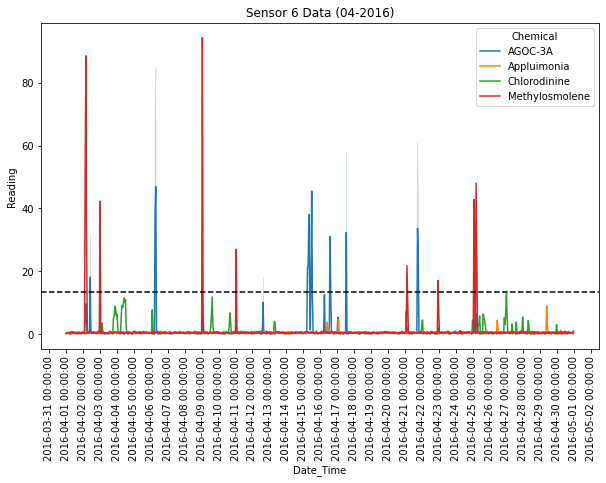

In [346]:
sensor_6_2016_04 = sensor_6[sensor_6['Date_Time'].dt.strftime('%Y-%m') == '2016-04']
sensor_6_2016_04 = sensor_6_2016_04.sort_values(by=['Chemical'])

fig, ax = plt.subplots(figsize=(10,6))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M:%S'))
plt.xticks(rotation = 90)
ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))
sns.lineplot(data = sensor_6_2016_04, x = 'Date_Time', y = 'Reading', hue = 'Chemical').set(title = "Sensor 6 Data (04-2016)")
plt.axhline(y = 13.35, color ="black", linestyle ="--")

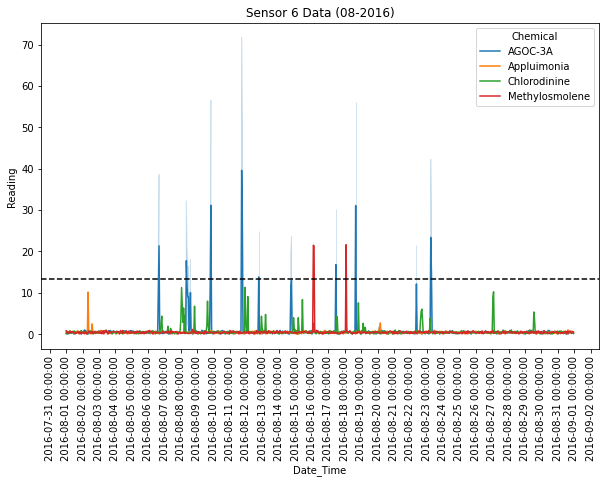

In [358]:
sensor_6_2016_08 = sensor_6[sensor_6['Date_Time'].dt.strftime('%Y-%m') == '2016-08']
sensor_6_2016_08 = sensor_6_2016_08.sort_values(by=['Chemical'])

fig, ax = plt.subplots(figsize=(10,6))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M:%S'))
plt.xticks(rotation = 90)
ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))
sns.lineplot(data = sensor_6_2016_08, x = 'Date_Time', y = 'Reading', hue = 'Chemical').set(title = "Sensor 6 Data (08-2016)")
plt.axhline(y = 13.35, color ="black", linestyle ="--")

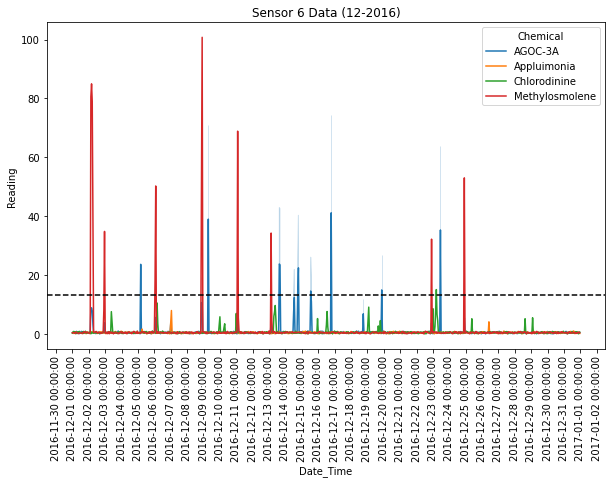

In [359]:
sensor_6_2016_12 = sensor_6[sensor_6['Date_Time'].dt.strftime('%Y-%m') == '2016-12']
sensor_6_2016_12 = sensor_6_2016_12.sort_values(by=['Chemical'])

fig, ax = plt.subplots(figsize=(10,6))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M:%S'))
plt.xticks(rotation = 90)
ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))
sns.lineplot(data = sensor_6_2016_12, x = 'Date_Time', y = 'Reading', hue = 'Chemical').set(title = "Sensor 6 Data (12-2016)")
plt.axhline(y = 13.35, color ="black", linestyle ="--")

## Sensor 7 Data

In [252]:
# Create a new data fram for Sensor 7
sensor_7 = sensor_data[sensor_data.Monitor == 7]
sensor_7 = sensor_7.sort_values(by=['Chemical'])

In [335]:
sensor_7.describe()

,Monitor,Reading
count,8806.0,8806.000000
mean,7.0,0.662350
std,0.0,1.486601
min,7.0,0.001060
25%,7.0,0.195541
50%,7.0,0.425315
75%,7.0,0.824655
max,7.0,63.315990


In [336]:
0.66 + (3 * 1.49)

5.13

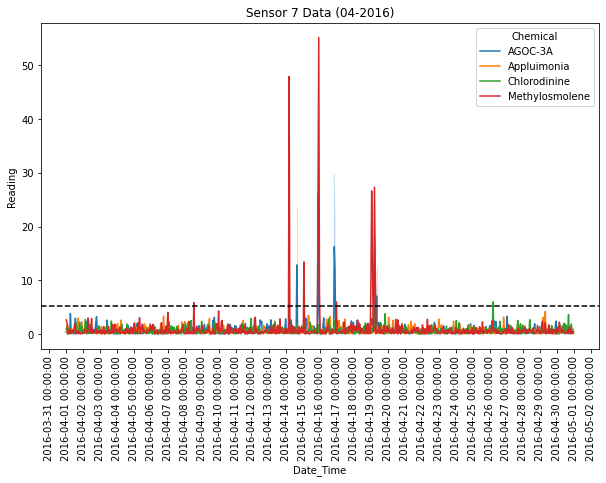

In [348]:
sensor_7_2016_04 = sensor_7[sensor_7['Date_Time'].dt.strftime('%Y-%m') == '2016-04']
sensor_7_2016_04 = sensor_7_2016_04.sort_values(by=['Chemical'])

fig, ax = plt.subplots(figsize=(10,6))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M:%S'))
plt.xticks(rotation = 90)
ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))
sns.lineplot(data = sensor_7_2016_04, x = 'Date_Time', y = 'Reading', hue = 'Chemical').set(title = "Sensor 7 Data (04-2016)")
plt.axhline(y = 5.13, color ="black", linestyle ="--")

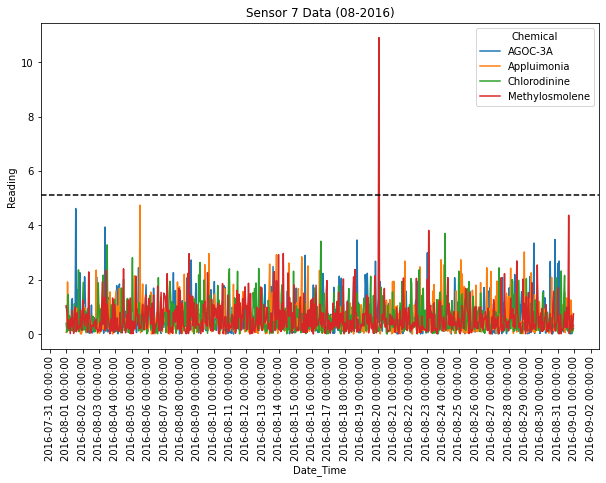

In [413]:
sensor_7_2016_08 = sensor_7[sensor_7['Date_Time'].dt.strftime('%Y-%m') == '2016-08']
sensor_7_2016_08 = sensor_7_2016_08.sort_values(by=['Chemical'])

fig, ax = plt.subplots(figsize=(10,6))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M:%S'))
plt.xticks(rotation = 90)
ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))
sns.lineplot(data = sensor_7_2016_08, x = 'Date_Time', y = 'Reading', hue = 'Chemical').set(title = "Sensor 7 Data (08-2016)")
plt.axhline(y = 5.13, color ="black", linestyle ="--")

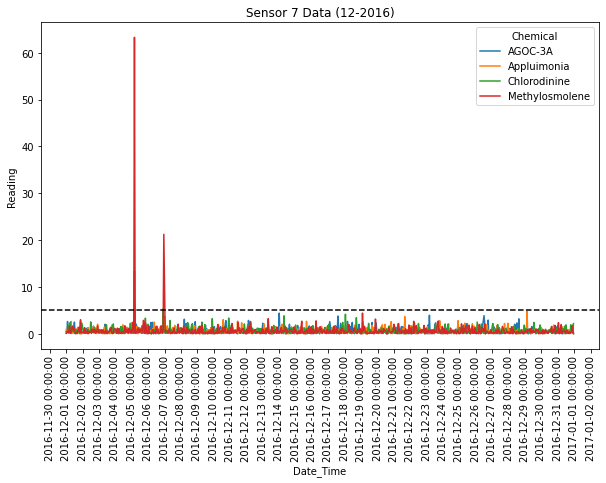

In [414]:
sensor_7_2016_12 = sensor_7[sensor_7['Date_Time'].dt.strftime('%Y-%m') == '2016-12']
sensor_7_2016_12 = sensor_7_2016_12.sort_values(by=['Chemical'])

fig, ax = plt.subplots(figsize=(10,6))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M:%S'))
plt.xticks(rotation = 90)
ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))
sns.lineplot(data = sensor_7_2016_12, x = 'Date_Time', y = 'Reading', hue = 'Chemical').set(title = "Sensor 7 Data (12-2016)")
plt.axhline(y = 5.13, color ="black", linestyle ="--")

## Sensor 8 Data

In [253]:
# Create a new data fram for Sensor 8
sensor_8 = sensor_data[sensor_data.Monitor == 8]
sensor_8 = sensor_8.sort_values(by=['Chemical'])

In [337]:
sensor_8.describe()

,Monitor,Reading
count,8806.0,8806.000000
mean,8.0,0.504047
std,0.0,1.301882
min,8.0,0.001025
25%,8.0,0.209090
50%,8.0,0.426119
75%,8.0,0.676207
max,8.0,101.105580


In [338]:
0.5 + (3 * 1.30)

4.4

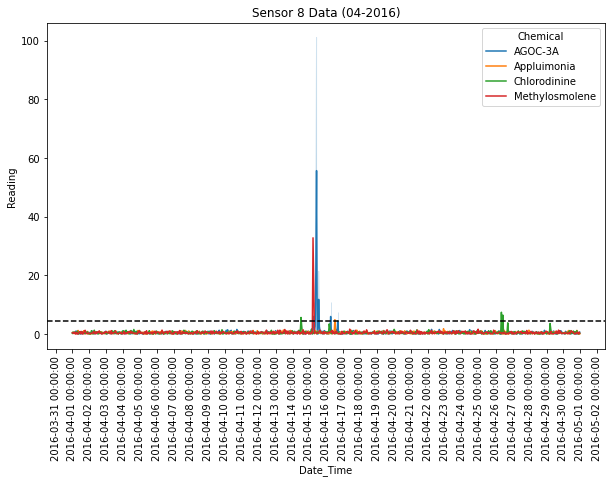

In [350]:
sensor_8_2016_04 = sensor_8[sensor_8['Date_Time'].dt.strftime('%Y-%m') == '2016-04']
sensor_8_2016_04 = sensor_8_2016_04.sort_values(by=['Chemical'])

fig, ax = plt.subplots(figsize=(10,6))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M:%S'))
plt.xticks(rotation = 90)
ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))
sns.lineplot(data = sensor_8_2016_04, x = 'Date_Time', y = 'Reading', hue = 'Chemical').set(title = "Sensor 8 Data (04-2016)")
plt.axhline(y = 4.4, color ="black", linestyle ="--")

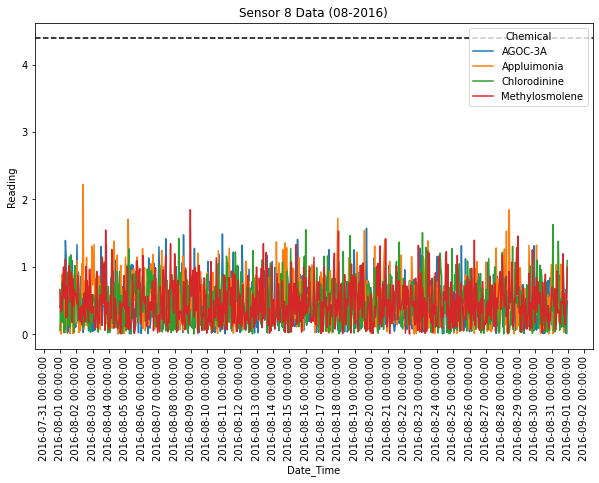

In [415]:
sensor_8_2016_08 = sensor_8[sensor_8['Date_Time'].dt.strftime('%Y-%m') == '2016-08']
sensor_8_2016_08 = sensor_8_2016_08.sort_values(by=['Chemical'])

fig, ax = plt.subplots(figsize=(10,6))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M:%S'))
plt.xticks(rotation = 90)
ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))
sns.lineplot(data = sensor_8_2016_08, x = 'Date_Time', y = 'Reading', hue = 'Chemical').set(title = "Sensor 8 Data (08-2016)")
plt.axhline(y = 4.4, color ="black", linestyle ="--")

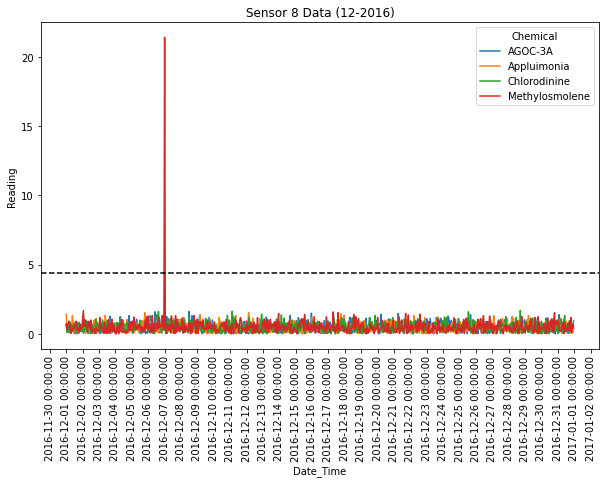

In [416]:
sensor_8_2016_12 = sensor_8[sensor_8['Date_Time'].dt.strftime('%Y-%m') == '2016-12']
sensor_8_2016_12 = sensor_8_2016_12.sort_values(by=['Chemical'])

fig, ax = plt.subplots(figsize=(10,6))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M:%S'))
plt.xticks(rotation = 90)
ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))
sns.lineplot(data = sensor_8_2016_12, x = 'Date_Time', y = 'Reading', hue = 'Chemical').set(title = "Sensor 8 Data (12-2016)")
plt.axhline(y = 4.4, color ="black", linestyle ="--")

## Sensor 9 Data

In [254]:
# Create a new data fram for Sensor 9
sensor_9 = sensor_data[sensor_data.Monitor == 9]
sensor_9 = sensor_9.sort_values(by=['Chemical'])

In [339]:
sensor_9.describe()

,Monitor,Reading
count,8804.0,8804.000000
mean,9.0,0.478501
std,0.0,1.297892
min,9.0,0.001216
25%,9.0,0.138862
50%,9.0,0.288440
75%,9.0,0.501246
max,9.0,47.956020


In [340]:
0.48 + (3 * 1.30)

4.380000000000001

In [372]:
sensor_9_2016_04 = sensor_9[sensor_9['Date_Time'].dt.strftime('%Y-%m') == '2016-04']
sensor_9_2016_04 = sensor_9_2016_04.sort_values(by=['Chemical'])

sensor_9_2016_08 = sensor_9[sensor_9['Date_Time'].dt.strftime('%Y-%m') == '2016-08']
sensor_9_2016_08 = sensor_9_2016_08.sort_values(by=['Chemical'])

sensor_9_2016_12 = sensor_9[sensor_9['Date_Time'].dt.strftime('%Y-%m') == '2016-12']
sensor_9_2016_12 = sensor_9_2016_12.sort_values(by=['Chemical'])

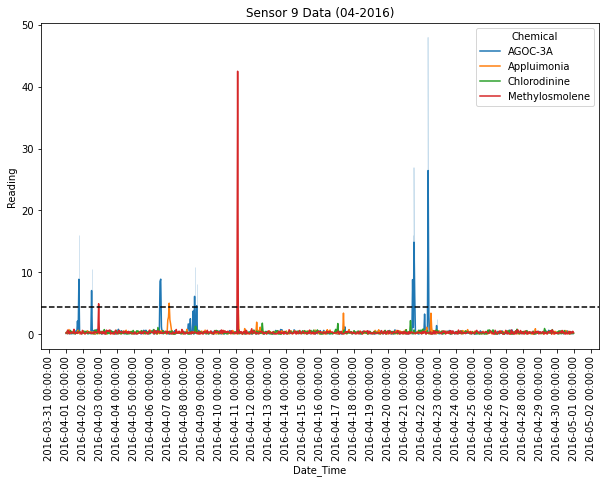

In [417]:
fig, ax = plt.subplots(figsize=(10,6))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M:%S'))
plt.xticks(rotation = 90)
ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))
sns.lineplot(data = sensor_9_2016_04, x = 'Date_Time', y = 'Reading', hue = 'Chemical').set(title = "Sensor 9 Data (04-2016)")
plt.axhline(y = 4.38, color ="black", linestyle ="--")

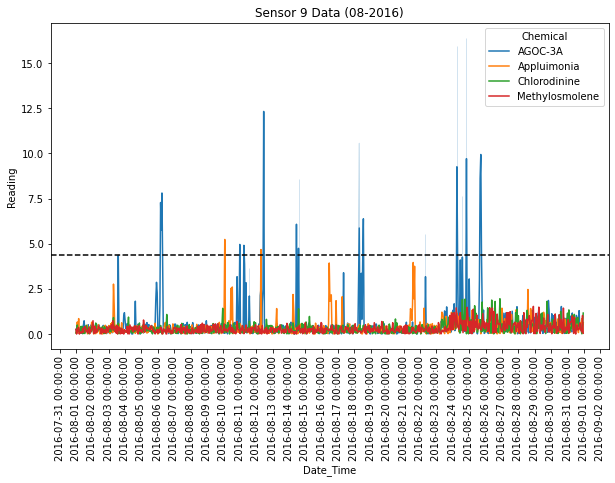

In [418]:
fig, ax = plt.subplots(figsize=(10,6))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M:%S'))
plt.xticks(rotation = 90)
ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))
sns.lineplot(data = sensor_9_2016_08, x = 'Date_Time', y = 'Reading', hue = 'Chemical').set(title = "Sensor 9 Data (08-2016)")
plt.axhline(y = 4.38, color ="black", linestyle ="--")

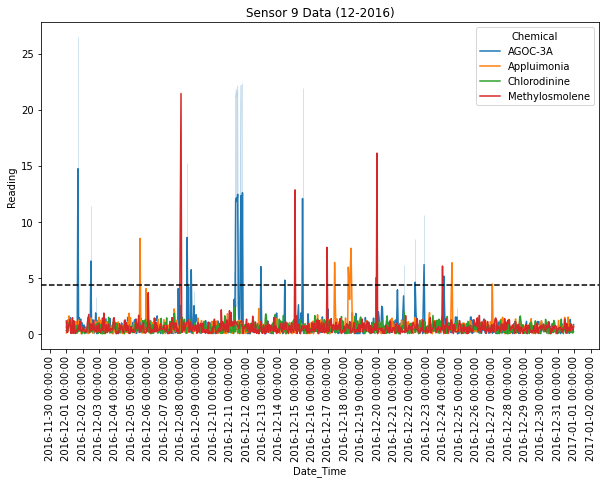

In [419]:
fig, ax = plt.subplots(figsize=(10,6))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M:%S'))
plt.xticks(rotation = 90)
ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))
sns.lineplot(data = sensor_9_2016_12, x = 'Date_Time', y = 'Reading', hue = 'Chemical').set(title = "Sensor 9 Data (12-2016)")
plt.axhline(y = 4.38, color ="black", linestyle ="--")